In [232]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from factor_analyzer import FactorAnalyzer

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']

In [233]:
data = pd.read_excel(r"C:\\Users\Administrator\Desktop\\1.xlsx")

In [234]:
def gg(tt):
    x = data[tt].str.split(",",expand=True)
    x =pd.concat([data[tt],x],axis = 1)
    x = x.fillna(method='ffill',axis=1)
    x = x.drop(tt,axis=1)
    return x
    

In [235]:
zz = data['t1']
for i in ['t7','t10','t11','t12','t13','t14','t15']:
    z = gg(i)
    zz = pd.concat([zz,z],axis=1)




In [236]:
zz = zz.drop("t1",axis=1)

In [237]:
x = zz

In [238]:
x = x.set_axis(['t7_0', 't7_1', 't7_2', 't10_0', 't10_1','t10_2','t11_0','t11_1','t11_2','t12_0','t12_1','t12_2','13_0','13_1','13_2',
'14_0','14_1','14_2','14_3','14_4','14_5','15_0','15_1','15_2','15_3','15_4'], axis='columns', inplace=False)

In [239]:
data1=pd.read_excel(r"C:\\Users\Administrator\Desktop\\2.xlsx")

In [240]:
df = pd.concat([data1,x],axis=1)

In [241]:
df = df.astype(int)

In [242]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value   

(4852.2673390630325, 0.0)

In [243]:
#KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.6690323546831206

In [244]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)
 
# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
print(ev,v)

[5.56652522 3.37934019 3.16823983 2.57178856 2.05854031 1.85531479
 1.66846284 1.55269392 1.33009336 1.18778541 1.06977594 1.04827422
 0.87722676 0.72674335 0.70639351 0.69560097 0.541895   0.52246474
 0.49573507 0.43958024 0.43167774 0.3163744  0.30882842 0.28783623
 0.25446166 0.23454823 0.17647229 0.16829842 0.09603925 0.08869055
 0.06660625 0.04680932 0.03707846 0.02380457] [ 5.49669697e+00  3.22851955e+00  3.08312341e+00  2.46171464e+00
  1.98567614e+00  1.76600968e+00  1.58518827e+00  1.30937890e+00
  1.22656557e+00  9.24575166e-01  7.44652671e-01  7.01883569e-01
  5.98439908e-01  5.36918957e-01  4.54633037e-01  4.20105184e-01
  3.97879460e-01  2.98412078e-01  2.94017100e-01  2.53719478e-01
  2.16835634e-01  1.90849427e-01  1.17635178e-01  1.00342867e-01
  8.90071626e-02  1.93099635e-02  1.37495880e-02  8.44156787e-03
  5.82636830e-03  1.05655447e-03 -5.32635138e-03 -1.22036373e-02
 -1.56139013e-02 -1.73122065e-02]


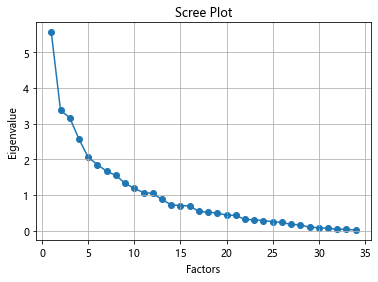

In [245]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形

In [246]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [247]:
df.to_csv('1.csv')

In [248]:
# 公因子方差
faa_two.get_communalities()

array([0.25367996, 0.00524552, 0.22150017, 0.10376797, 0.22530072,
       0.11007593, 0.01151154, 0.04723028, 0.5766482 , 0.6292985 ,
       0.41773709, 0.03890705, 0.02479397, 0.06642555, 0.14525593,
       0.08458275, 0.04825355, 0.01700509, 0.17759413, 0.17893575,
       0.00654101, 0.00249969, 0.01242736, 0.0611449 , 0.34515815,
       0.69634415, 0.7254135 , 0.68025565, 0.62568255, 0.00485925,
       0.22553725, 0.37715973, 0.34185891, 0.31059132])

In [249]:
pd.DataFrame(faa_two.get_communalities(),index=df.columns)

,0
t1,0.253680
t2,0.005246
t3,0.221500
t4,0.103768
t5,0.225301
t6,0.110076
t8,0.011512
t9,0.047230
t7_0,0.576648
t7_1,0.629298


In [250]:
faa_two.get_eigenvalues()

(array([5.56652522, 3.37934019, 3.16823983, 2.57178856, 2.05854031,
        1.85531479, 1.66846284, 1.55269392, 1.33009336, 1.18778541,
        1.06977594, 1.04827422, 0.87722676, 0.72674335, 0.70639351,
        0.69560097, 0.541895  , 0.52246474, 0.49573507, 0.43958024,
        0.43167774, 0.3163744 , 0.30882842, 0.28783623, 0.25446166,
        0.23454823, 0.17647229, 0.16829842, 0.09603925, 0.08869055,
        0.06660625, 0.04680932, 0.03707846, 0.02380457]),
 array([ 5.04432646,  2.75489326,  2.52664393,  1.61846729,  1.16466114,
         1.08450046,  0.77528629,  0.6468549 ,  0.50304355,  0.35096046,
         0.25347715,  0.10823207,  0.0270416 , -0.03339065, -0.14473644,
        -0.16273002, -0.19461469, -0.25299247, -0.2616154 , -0.312458  ,
        -0.36270689, -0.36815084, -0.383482  , -0.41993305, -0.43847625,
        -0.50547837, -0.53511452, -0.55666892, -0.58778166, -0.60877409,
        -0.61446702, -0.69581144, -0.72030397, -0.89947884]))

In [251]:
pd.DataFrame(faa_two.get_eigenvalues())

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,5.566525,3.379340,3.168240,2.571789,2.058540,1.855315,1.668463,1.552694,1.330093,1.187785,...,0.254462,0.234548,0.176472,0.168298,0.096039,0.088691,0.066606,0.046809,0.037078,0.023805
1,5.044326,2.754893,2.526644,1.618467,1.164661,1.084500,0.775286,0.646855,0.503044,0.350960,...,-0.438476,-0.505478,-0.535115,-0.556669,-0.587782,-0.608774,-0.614467,-0.695811,-0.720304,-0.899479


In [252]:
# 变量个数*因子个数
faa_two.loadings_

array([[-0.13205027, -0.48604803],
       [ 0.01459505,  0.07094013],
       [ 0.04804066, -0.46817974],
       [-0.20711182,  0.24672386],
       [ 0.08686072,  0.46664326],
       [ 0.11883821, -0.30976348],
       [ 0.03101924, -0.10270999],
       [ 0.07189513, -0.20508868],
       [-0.05299075,  0.75752239],
       [ 0.02170834,  0.79298628],
       [ 0.03980053,  0.64509922],
       [ 0.04446146,  0.19217238],
       [ 0.08856723,  0.13019144],
       [ 0.25758529,  0.00868149],
       [ 0.18674218,  0.3322398 ],
       [ 0.25289399,  0.14362233],
       [ 0.1796351 ,  0.12643094],
       [ 0.13035333,  0.00361902],
       [ 0.41916116, -0.04356656],
       [ 0.41621197, -0.07552049],
       [-0.08039443, -0.00881735],
       [ 0.0332639 , -0.03732557],
       [ 0.09960522, -0.0500616 ],
       [ 0.22040672,  0.11209716],
       [ 0.58361137,  0.06749757],
       [ 0.8341535 ,  0.02306722],
       [ 0.85139511, -0.02323481],
       [ 0.82468625, -0.01217516],
       [ 0.79099762,

In [253]:
pd.DataFrame(faa_two.loadings_,index=df.columns)

,0,1
t1,-0.132050,-0.486048
t2,0.014595,0.070940
t3,0.048041,-0.468180
t4,-0.207112,0.246724
t5,0.086861,0.466643
t6,0.118838,-0.309763
t8,0.031019,-0.102710
t9,0.071895,-0.205089
t7_0,-0.052991,0.757522
t7_1,0.021708,0.792986


In [254]:
faa_two.get_factor_variance()

(array([5.04432035, 2.75490269]),
 array([0.14836236, 0.08102655]),
 array([0.14836236, 0.22938891]))

In [255]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
print(df1)

              0         1
t1     0.132050  0.486048
t2     0.014595  0.070940
t3     0.048041  0.468180
t4     0.207112  0.246724
t5     0.086861  0.466643
t6     0.118838  0.309763
t8     0.031019  0.102710
t9     0.071895  0.205089
t7_0   0.052991  0.757522
t7_1   0.021708  0.792986
t7_2   0.039801  0.645099
t10_0  0.044461  0.192172
t10_1  0.088567  0.130191
t10_2  0.257585  0.008681
t11_0  0.186742  0.332240
t11_1  0.252894  0.143622
t11_2  0.179635  0.126431
t12_0  0.130353  0.003619
t12_1  0.419161  0.043567
t12_2  0.416212  0.075520
13_0   0.080394  0.008817
13_1   0.033264  0.037326
13_2   0.099605  0.050062
14_0   0.220407  0.112097
14_1   0.583611  0.067498
14_2   0.834153  0.023067
14_3   0.851395  0.023235
14_4   0.824686  0.012175
14_5   0.790998  0.002305
15_0   0.017744  0.067412
15_1   0.474100  0.027681
15_2   0.610604  0.065741
15_3   0.580218  0.072152
15_4   0.554885  0.051903


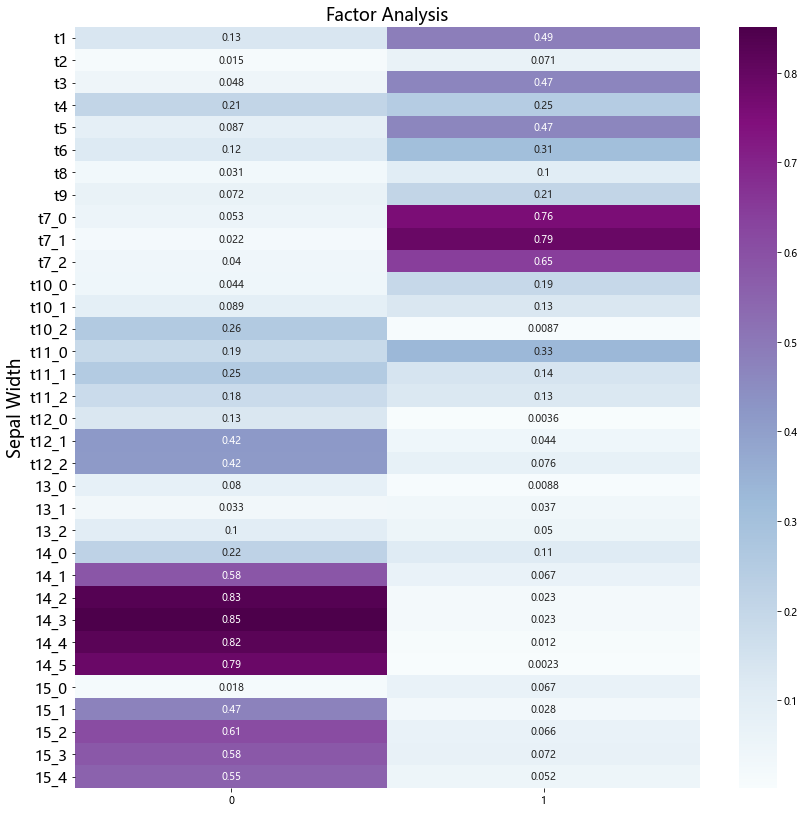

In [256]:
# 绘图
import seaborn as sns
plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()
 
# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

In [257]:
faa_two.transform(df)

array([[ 6.45729301e-01,  9.66986320e-01],
       [ 9.42548943e-02, -3.49383292e-01],
       [ 4.87789438e-01,  1.39758073e-01],
       [-1.13284627e-02,  1.39883875e-01],
       [-1.21450324e-01,  1.16658918e+00],
       [ 1.01302310e+00, -3.22735678e-01],
       [ 7.76463712e-01, -5.70558245e-01],
       [-1.31498338e-01, -1.75794471e+00],
       [-2.23471565e+00,  8.37088058e-01],
       [ 6.76141940e-01, -3.38386476e-01],
       [-5.00743543e-01, -7.82922310e-01],
       [ 1.12535140e+00,  1.05493352e+00],
       [-1.74965039e+00,  4.34327963e-01],
       [ 5.54195324e-01,  3.63286108e-01],
       [ 6.04934754e-01, -9.85899752e-02],
       [ 1.16715360e+00,  5.65817128e-01],
       [-1.04601509e+00,  8.89393643e-01],
       [-1.35858025e+00,  5.39155014e-01],
       [ 9.02432184e-01,  1.74785271e+00],
       [-1.28174470e+00, -7.32432517e-01],
       [ 1.15917331e-01, -1.97821406e-01],
       [-7.13294884e-01,  4.99824891e-01],
       [ 2.40039425e-02, -7.29506124e-01],
       [ 1.

In [258]:
df2 = pd.DataFrame(faa_two.transform(df))
print(df2)

            0         1
0    0.645729  0.966986
1    0.094255 -0.349383
2    0.487789  0.139758
3   -0.011328  0.139884
4   -0.121450  1.166589
..        ...       ...
206  0.393264 -0.128017
207 -1.960304  0.325699
208  1.292869  0.522764
209  0.539788 -0.572633
210  0.850708  0.171252

[211 rows x 2 columns]
